# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [9]:
# Q1 (code)
!pip install tomotopy
!pip install little_mallet_wrapper

In [10]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [11]:
# Define file paths
sanders_tweets_path = r'C:\Users\hp\Desktop\A3\Assignment3-AD\sanders_tweets.csv'  # Sanders' tweets file path
trump_tweets_path = r'C:\Users\hp\Desktop\A3\Assignment3-AD\trump_tweets.csv'  # Trump's tweets file path

# Read datasets
sanders_tweets = pd.read_csv(sanders_tweets_path)  # Read Sanders' tweets
trump_tweets = pd.read_csv(trump_tweets_path)  # Read Trump's tweets

# Concatenate datasets
combined_tweets = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)  # Combine Sanders and Trump's tweets

# Display the head of the combined dataset to ensure it's successfully merged
print(combined_tweets.head())  # Print the first few rows of the combined dataset


     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [12]:
# Q3 (code)

# Tip: add the following line to remove URLS and user mentions
# processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the NLTK stopwords list
nltk.download('punkt')
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Initialize empty lists to store processed texts and other information
training_data = []
original_texts = []
titles = []

for index, row in combined_tweets.iterrows():
    # Convert the tweet text to lowercase
    processed_text = row['Content'].lower() 
    # Remove URLs, user mentions, and specific identifiers
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    # Remove punctuation
    processed_text = re.sub(r'[^\w\s]', '', processed_text)
    # Remove numbers
    processed_text = re.sub(r'\d+', '', processed_text)
    # Tokenize
    word_tokens = word_tokenize(processed_text)
    # Remove stopwords
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    # Add the processed text to the list
    training_data.append(' '.join(filtered_sentence))
    
    # Add original text and identifiers
    original_texts.append(row['Content'])
    titles.append(f"{row['Username']}_{row['TweetId']}") 

# Show part of the processing result
print(training_data[:5])
print(original_texts[:5])
print(titles[:5])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase us minimum wage must tax rich amp raise minimum wage least', 'amidst massive income wealth inequality tens millions americans working starvation wages need raise minimum wage living wage least hour excuses need act', 'resources skills techniques get rid poverty question whether nation dr martin luther king jr', 'surviving attempt life russian activist alexei navalny detained bravely returning russia today call release united states must stand fighting corruption working democracy around world', 'presidentelect bidens covid rescue plan begin provide people muchneeded support direct payments minimum wage look forward working colleagues congress urgently provide bold relief working families']
['Wealth increase in past 10 months:\n⬆️$173 billion: Elon Musk\n⬆️$77 billion: Jeff Bezos\n⬆️$60 billion: Walton family\n⬆️$43 billion: Bill Gates\n⬆️$39 

In [13]:
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [14]:
# Q4 (code)

# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.324370043820041
Iteration: 10	Log-likelihood: -8.872455807578447
Iteration: 20	Log-likelihood: -8.680543518964221
Iteration: 30	Log-likelihood: -8.588667284499778
Iteration: 40	Log-likelihood: -8.530157714663167
Iteration: 50	Log-likelihood: -8.496073184544423
Iteration: 60	Log-likelihood: -8.463956017053201
Iteration: 70	Log-likelihood: -8.444910424783037
Iteration: 80	Log-likelihood: -8.425476833130068
Iteration: 90	Log-likelihood: -8.410708918901104


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [15]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

biden rt joe election vote win democrat republican radical left

✨Topic 1✨

rt trump fbi campaign obama general russia investigation comey report

✨Topic 2✨

health care border people wall country must right security want

✨Topic 3✨

us china states many deal trade amp much united good

✨Topic 4✨

people must us war court states united stand end american

✨Topic 5✨

jobs economy tax record amp american years new ever year

✨Topic 6✨

rt president amp trump american support today help covid coronavirus

✨Topic 7✨

democrats rt impeachment house nothing amp president senate dems schiff

✨Topic 8✨

law rt amp police national enforcement women new people federal

✨Topic 9✨

rt president today great pm live honor thank day join

✨Topic 10✨

great thank america big make new congratulations see maga job

✨Topic 11✨

great endorsement total military strong complete amp vote amendment vets

✨Topic 12✨

news fake media amp never people even bad story like

✨Top

In [ ]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

# Topic 0 : It focuses on political dynamics about the elections, mentioning key concepts and famous people such as Joe Biden, elections, Democrats, Republicans, and political descriptors like "radical left." It seems to talk about the partisan divide and election discourse.

# Topic 1: It focuses on investigations and controversies, mentioning Trump, the FBI, Obama, and Russia. It likely relates to investigations involving Trump's campaign and presidency

# Topic 2: It focuses on issues related to health care and national security, mentioning border, wall, country, and security. This topic may be discussions on border security and health care policies

# Topic 3: It focuses on international relations, particularly with China, discussing trade deals, the United States, and economic implications of these relationships.

# Topic 4: It focuses on national identity and governance issues, mentioning "war," "court," "United States," and "American." This could relate to discussions on patriotism, the judiciary, and national unity.

#T opic 5: It focuses on economic topics, highlighting "jobs," "economy," "tax," and achievements in the economic sector. It reflects discussions around economic growth and policy.

# Topic 6: It focuses on presidential support and national issues, including support for Trump, American patriotism, and responses to COVID-19 and the coronavirus.

# Topic 7: It focuses on political processes and conflicts, particularly impeachment, with mentions of Democrats, the Senate, and key figures involved in impeachment proceedings.

# Topic 8: It focuses on law enforcement and societal issues, mentioning "law," "police," "national," and "women." This could relate to discussions on law enforcement policies and social justice.

# Topic 9: It focuses on presidential events and public appearances, with words like "president," "today," "live," "honor," and "thank."

# Topic 10: It focuses on patriotism and political campaigning, with a focus on America, achievements, and the slogan "Make America Great Again."

#Topic 11: It focuses on endorsements, military support, and constitutional rights, emphasizing strong military support and the Second Amendment.

#Topic 12: It addresses media criticism, with a focus on "fake news," media bias, and public perception of media coverage.

#Topic 13: It focuses on personal and political attributes of President Trump, mentioning his presidency, perceptions, and statements attributed to him.

# Topic 14: It focuses on economic justice and labor issues, discussing workers, taxes, and the economic needs of Americans, possibly reflecting on economic policies affecting the working class.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [16]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5447900949915251 
Per Topic: [0.5528515502810478, 0.6533754587173461, 0.5634495675563812, 0.563346154987812, 0.5384092718362808, 0.4968708619475365, 0.40467480942606926, 0.572063946723938, 0.41049972251057626, 0.5241747684776783, 0.46551894918084147, 0.7493296056985855, 0.6214546397328377, 0.46440722048282623, 0.591424897313118]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [ ]:
# Q6 (words)

# I started with 15 topics for my LDA model and got an average coherence score of 0.5448. 
# This score tells us the topics make sense together, but there's room for improvement.
# The coherence varied a lot across topics, from 0.7493 down to 0.4047. 
# This means some topics were clear and well-defined, while others were a bit muddled.
# I thought about changing the number of topics to see if it helps. 
# Playing around with the number could make some topics clearer or merge the ones that aren't as strong.
# In the end, starting with 15 topics gave me a good look at what's being talked about in the data, showing which areas are strong and which could use a tweak. 
# My next step would be to adjust the number of topics to try and get better clarity across the board.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

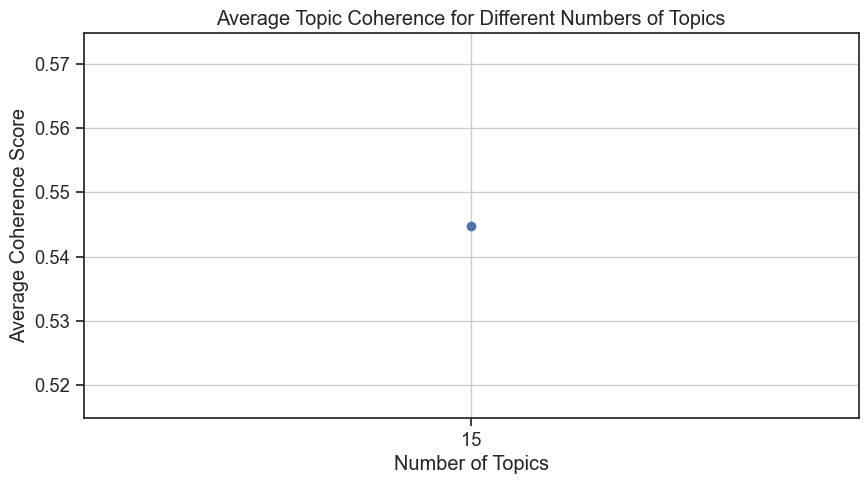

In [41]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model

import matplotlib.pyplot as plt

def plot_coherence(x, y):
    """
    Plots the average topic coherence against the number of topics in the model.

    Parameters:
    x (list): A list of the number of topics used in each model.
    y (list): A list of the average coherence scores for each model.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o', linestyle='-', color='b')

    plt.title('Average Topic Coherence for Different Numbers of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence Score')
    plt.xticks(x)  # Ensure all topic numbers are displayed on x-axis
    plt.grid(True)
    
    plt.show()

# My data: one model with 15 topics and its average coherence score
num_topics_list = [15]
coherence_scores = [0.5447900949915251]

# Call the function with my data
plot_coherence(num_topics_list, coherence_scores)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [23]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [24]:
topic_distributions[32]

[0.0049202256,
 0.0044876025,
 0.18823043,
 0.052214555,
 0.0063556293,
 0.14204286,
 0.4185336,
 0.097392865,
 0.003146196,
 0.0043556956,
 0.0074299932,
 0.002518229,
 0.006968698,
 0.00742991,
 0.053973537]

In [33]:
selected_topics = [2, 3, 13]  # Focus on topics 2, 3, and 13

# Initialize a dictionary to hold the top documents for each selected topic
top_docs_per_topic = {topic: [] for topic in selected_topics}

# Number of top documents to retrieve for each topic
num_top_docs = 5

for doc_index, distribution in enumerate(topic_distributions):
    for topic in selected_topics:
        # Add (document index, topic proportion) tuple to the list for this topic
        top_docs_per_topic[topic].append((doc_index, distribution[topic]))

# Sort the documents for each topic based on their topic proportion, in descending order
for topic in selected_topics:
    top_docs_per_topic[topic].sort(key=lambda x: x[1], reverse=True)
    top_docs_per_topic[topic] = top_docs_per_topic[topic][:num_top_docs]

# Print out the top documents for each selected topic
for topic, docs in top_docs_per_topic.items():
    print(f"\nTop documents for Topic #{topic + 1}:")  # +1 to match my topic numbering
    for doc_index, proportion in docs:
        print(f"Doc #{doc_index} - Proportion: {proportion:.4f}")
        print(f"Content: {original_texts[doc_index][:100]}...")  # Print the first 100 characters of the document



Top documents for Topic #3:
Doc #14366 - Proportion: 0.9087
Content:  Will soon be landing in Calexico, California to look at a portion of the new WALL being built on ou...
Doc #2672 - Proportion: 0.9085
Content: Have you worked a minimum wage fast food job? What is it like to try to support yourself or your fam...
Doc #14228 - Proportion: 0.9034
Content:  Today we celebrate the lives and achievements of Americans with Down Syndrome. @VP and I will alway...
Doc #13232 - Proportion: 0.8985
Content:  I am pleased to announce that our very talented Deputy Secretary of Defense, Patrick Shanahan, will...
Doc #4039 - Proportion: 0.8976
Content: We do not need to throw 22 million off health insurance. We need Medicare-for-all, and I will introd...

Top documents for Topic #4:
Doc #10142 - Proportion: 0.9451
Content:  The United States has an $800 Billion Dollar Yearly Trade Deficit because of our “very stupid” trad...
Doc #10175 - Proportion: 0.9433
Content:  The deal with North Korea is ver

Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [ ]:
# Q7b (words)

# The results show a fascinating insight into the topics that could potentially be more representative of Trump's views or policy focuses, based on the content of the top documents (tweets) for each topic.

# Topic 3: The tweets under this topic seem to cover a range of issues, from immigration and wall construction to health insurance and support for individuals with Down Syndrome. 
# The mix of content here suggests a broad topic, possibly touching on social issues, health care, and immigration policy. 
# The tweets indicate that this topic captures a broad political discussion rather than being specific to one politician.

# Topic 4: The documents focus on trade deficits, international dealings (such as with North Korea), and federal policies (like student loan forgiveness). 
# This topic appears to be more aligned with Trump's known focus on trade policies, international negotiations, and education policy changes. 

# Topic 14: This topic's top tweets seem to heavily feature content supporting Trump, with mentions of books about him, campaign support messages, and critiques of investigations and media portrayal. 
# It's clear why this topic is representative of Trump, as it directly involves messages of support for him, discussions about his presidency, and criticisms of his opponents.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [34]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [37]:
print(len(titles))  
print(len(topic_distributions))  

30371
29208


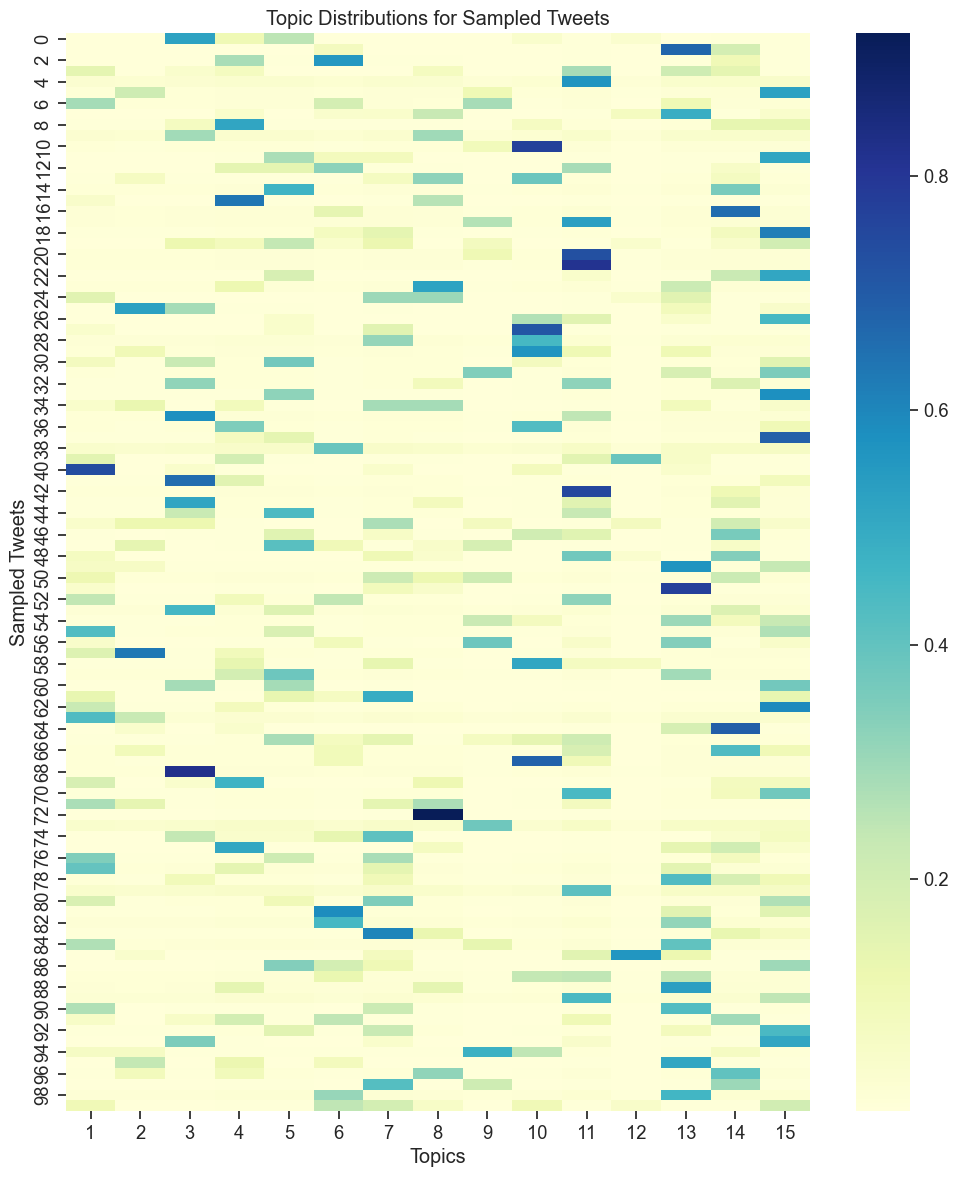

In [40]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

from random import sample
import seaborn as sns
import matplotlib.pyplot as plt

# Convert model.docs to a list and directly sample 100 documents from it
docs_sample = sample(list(model.docs), 100)
# Extract the topic distribution for each sampled document
sampled_distributions = [doc.get_topic_dist() for doc in docs_sample]

# Prepare the data for visualization
data_for_heatmap = sampled_distributions

# Create the heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(data_for_heatmap, cmap='YlGnBu', xticklabels=range(1, num_topics + 1), cbar=True)

plt.title('Topic Distributions for Sampled Tweets')
plt.xlabel('Topics')
plt.ylabel('Sampled Tweets')
plt.show()


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [ ]:
# Q9 (words)

# appears to be a pronounced emphasis on Topics 3, 10, and 11, as evidenced by the relatively darker shades in these columns across the sample of tweets. 
# This suggests that discussions related to these topics are more prevalent within the sampled dataset. 

# No. 
# To determine if certain topics are more likely for one of the politicians, we would need additional data that tags each tweet with the author's identity. 
# With such labels, we could then look for consistent patterns, such as a particular topic being more prominent in one politician’s tweets than the other’s.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)